In [1]:
import os

# 현재 작업 디렉토리 가져오기
currentDirectory = os.getcwd()
print("현재 디렉토리:", currentDirectory) 

# 3개 위의 폴더 찾기
folder_path_HYU = os.path.abspath(os.path.join(currentDirectory, "../../.."))
folder_path_gradThesis_data = os.path.join(folder_path_HYU,'gradThesis', 'data')
print("데이터 경로:", folder_path_gradThesis_data)

folder_path_gradThesis_result = os.path.join(folder_path_HYU, 'gradThesis', 'results')
print("데이터 경로:", folder_path_gradThesis_result)

intern_project_data_folder = os.path.join(currentDirectory,'data')
print("데이터 경로:", intern_project_data_folder)

import pandas as pd
import numpy as np
import time
import glob #폴더 내 특정 패턴을 가진 파일들 불러오기 위해서 사용
import re #정규 표현식을 사용하기 위함

import pickle

from LOL_data_pipeline import *
import UsefulModule

import matplotlib.pyplot as plt # 그림 그려볼까요?
from matplotlib import rc # 폰트 설정

# 폰트 설정
rc('font', family='Noto Sans KR')

# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

api_key = 'RGAPI-588d211a-21aa-4445-9b7b-3b46b38502ec'

API_hander = APIHander(api_key)

현재 디렉토리: c:\Users\erich\Desktop\HYU\응통인턴\2024 가을\프로젝트
데이터 경로: c:\Users\erich\Desktop\HYU\gradThesis\data
데이터 경로: c:\Users\erich\Desktop\HYU\gradThesis\results
데이터 경로: c:\Users\erich\Desktop\HYU\응통인턴\2024 가을\프로젝트\data


# 시각화

In [16]:
with open(f"{folder_path_gradThesis_data}//accuracies_14_21.pkl", 'rb') as file:
        accuracies_14_21 = pickle.load(file)

In [3]:
len(accuracies_14_21)

25

### figsize와 한글 그림 사이즈 변환

In [4]:
def convert_size(figsize, new_standard = None):
    '''
    기준 : figsize == 6 = 한글 그림 사이즈 == 90mm

    비례식
    6 : 90 = figsize : x
    return round(x, 2)

    새로운 기준이 들어오면
    6 : new_standard = figsize : x
    return round(x, 2)
    '''
    if new_standard is None:
        return round(90*figsize/6, 2)
    
    else:
        return round(new_standard*figsize/6, 2)

In [34]:
convert_size(7.5, 75)

93.75

### 게임이 종료되기 직전 정확도

In [14]:
accuracies = []
for idx in range(len(accuracies_14_21)):
    accuracies.append(accuracies_14_21[idx][-1])

game_minutes = [minute for minute in range(16,41)]

average_accuracy = sum(accuracies)/len(accuracies)
print(f"{average_accuracy}")

0.9896481217014602


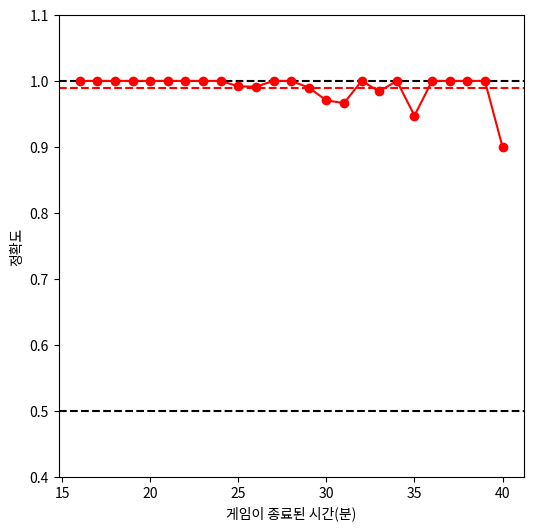

In [ ]:
plt.figure(figsize=(6,6))

# 승률 기준선 그리기
plt.axhline(y=1.0, color='black', linestyle='--')  # 상단 빨간 점선 (y=1.0)
plt.axhline(y=0.5, color='black', linestyle='--')  # 하단 빨간 점선 (y=0.5)

# 그래프 그리기
plt.plot(game_minutes, accuracies, 'o-', color='red')  # 데이터 포인트와 선

plt.axhline(y = average_accuracy, color = "red", linestyle = "--")

# 축 레이블 설정
plt.xlabel('게임이 종료된 시간(분)')
plt.ylabel('정확도')

# y축 범위 설정
plt.ylim(0.4, 1.1)

# 그래프 보여주기
plt.show()

### 특정 시간 까지 정보를 줬을 때의 정확도

In [7]:
accuracies = []
game_minutes = []

for dont_know_name in accuracies_14_21[::5] + [accuracies_14_21[-1]]:
    accuracies_one_min = []
    game_miutes_one_min = []
    for idx in range(len(dont_know_name)):
        accuracies_one_min.append(dont_know_name[idx])
        game_miutes_one_min.append(idx + 5)
    accuracies.append(accuracies_one_min)
    game_minutes.append(game_miutes_one_min)


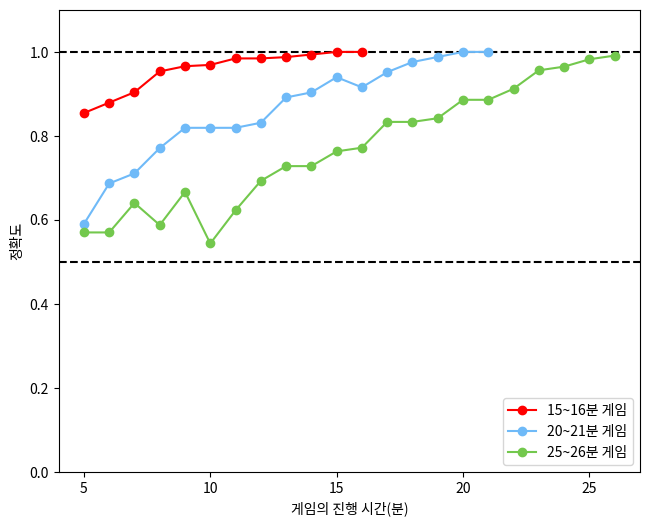

In [8]:
colors = ["red", "#6FBAF8", "#73C84D", "#4D8733", "#F5A623", "#FF6347"]

plt.figure(figsize=(7.5,6))

# y축 범위 설정
plt.xlim(4, 27)
plt.ylim(0, 1.1)

# 승률 기준선 그리기
plt.axhline(y=1.0, color='black', linestyle='--')  # 상단 빨간 점선 (y=1.0)
plt.axhline(y=0.5, color='black', linestyle='--')  # 하단 빨간 점선 (y=0.5)

# 그래프 그리기
for i in range(3):
    plt.plot(game_minutes[i], accuracies[i], 'o-', color=colors[i], label=f'{15 + 5 * i}~{16 + 5 * i}분 게임')  # 데이터 포인트와 선

# 축 레이블 설정
plt.xlabel('게임의 진행 시간(분)')
plt.ylabel('정확도')

plt.legend(loc='lower right')

# 그래프 보여주기
plt.show()

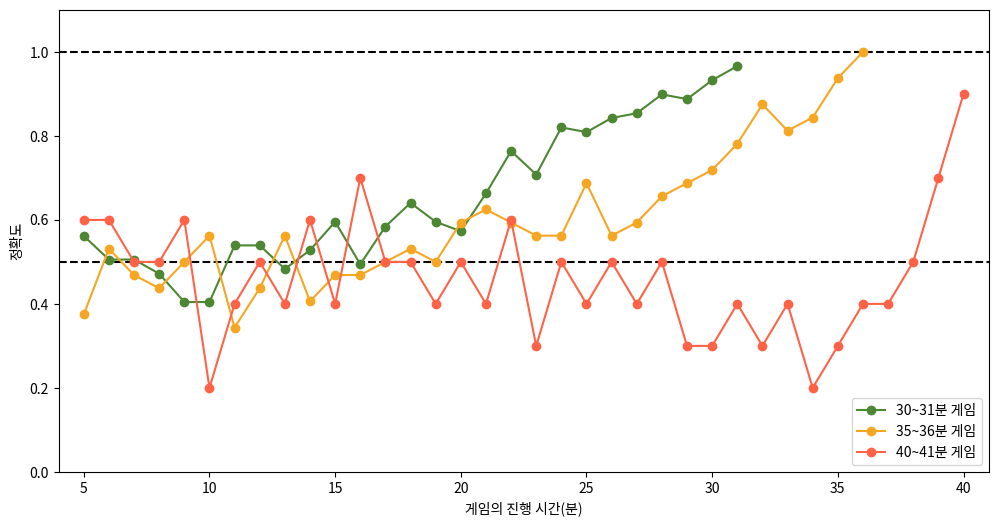

In [9]:
colors = ["red", "#6FBAF8", "#73C84D", "#4D8733", "#F5A623", "#FF6347"]

plt.figure(figsize=(12,6))

# y축 범위 설정
plt.xlim(4, 41)
plt.ylim(0, 1.1)

# 승률 기준선 그리기
plt.axhline(y=1.0, color='black', linestyle='--')  # 상단 빨간 점선 (y=1.0)
plt.axhline(y=0.5, color='black', linestyle='--')  # 하단 빨간 점선 (y=0.5)

# 그래프 그리기
for i in range(3,6):
    plt.plot(game_minutes[i], accuracies[i], 'o-', color=colors[i], label=f'{15 + 5 * i}~{16 + 5 * i}분 게임')  # 데이터 포인트와 선

# 축 레이블 설정
plt.xlabel('게임의 진행 시간(분)')
plt.ylabel('정확도')

plt.legend(loc='lower right')

# 그래프 보여주기
plt.show()

# 변수 중요도 확인

## 랜덤 포레스트 모델 불러오기

In [2]:
with open(f"{folder_path_gradThesis_data}//rf_models_14_21.pkl", 'rb') as file:
        rf_models_14_21 = pickle.load(file)

In [3]:
feature_importances_table = pd.DataFrame(index = range(80), columns = range(25))

for idx in range(len(rf_models_14_21)):
    feature_importances_table.loc[:, idx] = rf_models_14_21[idx][-1].feature_importances_

In [4]:
feature_importances_table.index = rf_models_14_21[0][-1].feature_names_in_
feature_importances_table.columns = range(16, 41)
feature_importances_table

,16,17,18,19,20,21,22,23,24,25,...,31,32,33,34,35,36,37,38,39,40
blue_TOP_K,0.001896,0.002084,0.004157,0.005235,0.004528,0.006487,0.003153,0.001026,0.001583,0.000684,...,0.001134,0.001972,0.001226,0.002683,0.003446,0.005014,0.004691,0.002246,0.006608,0.004499
blue_TOP_D,0.004281,0.005847,0.019699,0.004498,0.009513,0.006421,0.007823,0.005638,0.001732,0.003961,...,0.002974,0.005042,0.002735,0.005164,0.008909,0.008963,0.009853,0.003079,0.002578,0.009069
blue_TOP_A,0.001712,0.003987,0.008967,0.001816,0.004926,0.002716,0.016803,0.008483,0.009388,0.002347,...,0.006818,0.005564,0.009255,0.004418,0.002513,0.006622,0.009066,0.015422,0.025444,0.067413
blue_TOP_CS,0.002129,0.000841,0.012796,0.000898,0.001657,0.002851,0.001639,0.001877,0.001202,0.000515,...,0.003048,0.001895,0.003828,0.002297,0.00838,0.003706,0.004055,0.008015,0.0055,0.014165
blue_JUG_K,0.00933,0.005707,0.016724,0.00304,0.004584,0.005454,0.006881,0.00283,0.004405,0.001973,...,0.003882,0.002208,0.002299,0.003176,0.004666,0.003785,0.007829,0.005586,0.007137,0.002202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
red_TOP_LEVEL,0.004209,0.012717,0.002853,0.002199,0.004792,0.005405,0.006729,0.026629,0.005364,0.006434,...,0.013866,0.006805,0.012422,0.017424,0.003704,0.010661,0.013121,0.00072,0.015332,0.0
red_JUG_LEVEL,0.03812,0.015771,0.016005,0.037583,0.045515,0.050321,0.085634,0.07541,0.062116,0.072002,...,0.029215,0.025015,0.029533,0.038881,0.007218,0.015625,0.002733,0.006667,0.004347,0.002496
red_MID_LEVEL,0.007292,0.008471,0.009327,0.018579,0.009188,0.006785,0.012082,0.012925,0.016941,0.011115,...,0.004008,0.005314,0.015268,0.005424,0.002747,0.002625,0.006389,0.000304,0.007696,0.003663
red_ADC_LEVEL,0.017514,0.012192,0.008798,0.008645,0.018746,0.006875,0.007828,0.03704,0.051608,0.004575,...,0.001371,0.011368,0.017448,0.003449,0.004482,0.011703,0.001086,0.000306,0.001312,0.003638


### n 분 게임에서의 변수 중요도 순위

In [5]:
pd.set_option('display.max_rows', None)

# important features table은, 변수가 중요한 순서대로 넣어놓은 테이블
important_features_table = pd.DataFrame(index = range(80), columns=range(16,41))

for game_minute in range(16,41):
    sorted_importance = feature_importances_table[game_minute].sort_values(ascending=False)
    important_features_table[game_minute] = sorted_importance.index

important_features_table

,16,17,18,19,20,21,22,23,24,25,...,31,32,33,34,35,36,37,38,39,40
0,blue_MID_TURRET,blue_MID_TURRET,blue_MID_TURRET,blue_MID_TURRET,red_MID_TURRET,blue_MID_TURRET,blue_MID_TURRET,red_MID_TURRET,blue_MID_TURRET,blue_MID_TURRET,...,red_NEXUS_TURRET,blue_MID_INHIBITOR,red_NEXUS_TURRET,red_NEXUS_TURRET,red_NEXUS_TURRET,red_NEXUS_TURRET,red_NEXUS_TURRET,red_NEXUS_TURRET,red_NEXUS_TURRET,red_NEXUS_TURRET
1,red_BOT_TURRET,blue_SUP_A,red_TOP_D,red_MID_TURRET,blue_MID_TURRET,red_MID_TURRET,blue_JUG_LEVEL,blue_MID_TURRET,red_MID_TURRET,red_MID_TURRET,...,red_MID_INHIBITOR,blue_NEXUS_TURRET,blue_NEXUS_TURRET,blue_NEXUS_TURRET,blue_NEXUS_TURRET,blue_NEXUS_TURRET,blue_NEXUS_TURRET,blue_NEXUS_TURRET,blue_NEXUS_TURRET,red_MID_INHIBITOR
2,blue_SUP_A,red_MID_TURRET,blue_SUP_A,red_RIFTHERALD,blue_JUG_D,blue_JUG_LEVEL,red_MID_TURRET,blue_JUG_LEVEL,red_BARON_NASHOR,red_BARON_NASHOR,...,blue_NEXUS_TURRET,red_NEXUS_TURRET,red_MID_INHIBITOR,blue_MID_TURRET,red_MID_INHIBITOR,blue_MID_INHIBITOR,red_MID_INHIBITOR,red_SUP_A,red_MID_INHIBITOR,blue_NEXUS_TURRET
3,red_MID_TURRET,blue_BOT_TURRET,red_MID_TURRET,blue_SUP_A,blue_JUG_LEVEL,blue_SUP_A,red_JUG_LEVEL,red_JUG_LEVEL,blue_JUG_LEVEL,blue_JUG_LEVEL,...,blue_MID_INHIBITOR,blue_MID_TURRET,blue_MID_INHIBITOR,blue_MID_INHIBITOR,red_MID_TURRET,blue_MID_TURRET,blue_MID_INHIBITOR,blue_MID_INHIBITOR,blue_BOT_INHIBITOR,blue_TOP_A
4,blue_JUG_D,red_BOT_TURRET,red_SUP_A,red_TOP_TURRET,red_RIFTHERALD,red_JUG_LEVEL,blue_SUP_A,blue_SUP_A,red_JUG_LEVEL,red_JUG_LEVEL,...,red_MID_TURRET,red_MID_TURRET,red_MID_TURRET,red_MID_INHIBITOR,blue_MID_INHIBITOR,red_MID_INHIBITOR,red_MID_TURRET,red_MID_INHIBITOR,blue_TOP_A,red_MID_TURRET
5,red_SUP_A,red_SUP_A,blue_BOT_TURRET,blue_RIFTHERALD,red_SUP_A,red_SUP_A,blue_MID_LEVEL,red_BARON_NASHOR,red_ADC_LEVEL,blue_BARON_NASHOR,...,blue_MID_TURRET,red_MID_INHIBITOR,blue_MID_TURRET,red_MID_TURRET,blue_MID_TURRET,red_MID_TURRET,blue_MID_TURRET,blue_SUP_A,red_MID_TURRET,blue_JUG_D
6,blue_BOT_TURRET,blue_JUG_D,blue_MID_A,blue_JUG_LEVEL,red_JUG_LEVEL,blue_JUG_D,red_RIFTHERALD,blue_ADC_LEVEL,blue_SUP_A,blue_SUP_A,...,red_BARON_NASHOR,red_BARON_NASHOR,red_JUG_LEVEL,red_JUG_LEVEL,blue_JUG_LEVEL,blue_SUP_A,red_TOP_A,blue_SUP_D,blue_MID_INHIBITOR,red_SUP_A
7,red_TOP_TURRET,blue_JUG_A,blue_TOP_TURRET,red_JUG_LEVEL,blue_SUP_A,blue_BOT_TURRET,red_SUP_A,red_ADC_LEVEL,blue_ADC_LEVEL,blue_NEXUS_TURRET,...,red_JUG_LEVEL,red_JUG_LEVEL,blue_JUG_LEVEL,blue_SUP_LEVEL,red_BOT_TURRET,blue_DRAGON,red_TOP_TURRET,blue_MID_TURRET,red_TOP_TURRET,blue_MID_INHIBITOR
8,red_JUG_LEVEL,red_TOP_TURRET,red_BOT_TURRET,red_SUP_A,blue_BOT_TURRET,red_RIFTHERALD,red_JUG_D,blue_TOP_LEVEL,blue_SUP_LEVEL,red_BOT_TURRET,...,red_SUP_LEVEL,blue_ADC_LEVEL,red_BARON_NASHOR,red_SUP_LEVEL,red_SUP_LEVEL,red_TOP_A,red_BARON_NASHOR,blue_ADC_K,red_BOT_TURRET,red_TOP_K
9,blue_JUG_LEVEL,blue_JUG_LEVEL,red_JUG_K,red_BOT_TURRET,blue_RIFTHERALD,red_BOT_TURRET,blue_DRAGON,red_TOP_LEVEL,blue_BARON_NASHOR,blue_BOT_TURRET,...,blue_BOT_TURRET,blue_BARON_NASHOR,red_ADC_LEVEL,blue_JUG_LEVEL,red_TOP_TURRET,blue_ADC_K,blue_SUP_LEVEL,red_MID_TURRET,red_ADC_A,blue_DRAGON


In [44]:
important_features_table.to_csv(f"{folder_path_gradThesis_result}//important_features_table_14_21.csv", index=False)

In [21]:
sum_of_feature_importances_of_each_min = feature_importances_table.apply(sum,axis = 1)
sum_of_feature_importances_of_each_min

blue_TOP_K       0.072520
blue_TOP_D       0.145859
blue_TOP_A       0.245562
blue_TOP_CS      0.089795
blue_JUG_K       0.113910
                   ...   
red_TOP_LEVEL    0.230694
red_JUG_LEVEL    0.873571
red_MID_LEVEL    0.204796
red_ADC_LEVEL    0.284108
red_SUP_LEVEL    0.246838
Length: 80, dtype: float64

## 변수 중요도 plot

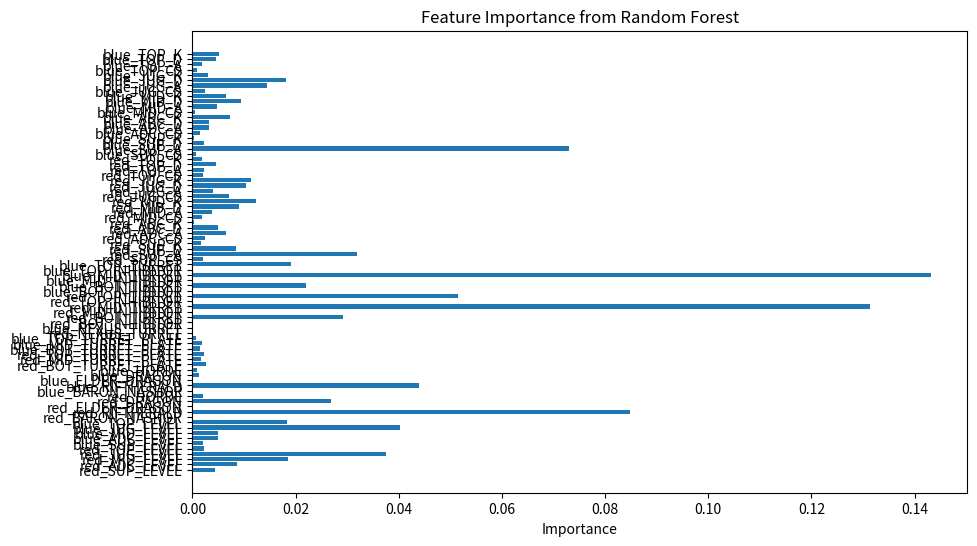

In [17]:
importances = rf_models_14_21[3][-1].feature_importances_
features = rf_models_14_21[3][-1].feature_names_in_

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # 중요도 높은 순서로 보이도록 Y축 뒤집기
plt.show()


## 오브젝트 비교

In [6]:
objects = ['blue_HORDE','blue_DRAGON','blue_ELDER_DRAGON','blue_RIFTHERALD','blue_BARON_NASHOR',
           'red_HORDE','red_DRAGON','red_ELDER_DRAGON','red_RIFTHERALD','red_BARON_NASHOR']

In [7]:
object_rankings_df = pd.DataFrame(index=objects, columns=range(16,41))
# Iterate through each column to find the row index of 'blue_HORDE' and 'red_HORDE'
for column in important_features_table.columns:
    for idx, value in important_features_table[column].items():
        if value in objects:
            object_rankings_df.loc[value, column] = 80 - (idx + 1)

object_rankings_df

,16,17,18,19,20,21,22,23,24,25,...,31,32,33,34,35,36,37,38,39,40
blue_HORDE,50,46,18,18,26,17,19,18,29,19,...,10,11,18,14,4,34,29,8,6,2
blue_DRAGON,27,62,23,19,61,68,70,50,53,64,...,57,61,54,59,45,72,8,28,65,70
blue_ELDER_DRAGON,7,4,3,6,3,0,1,0,3,0,...,0,0,0,0,0,1,0,0,0,3
blue_RIFTHERALD,13,60,69,74,70,66,69,39,7,8,...,2,2,3,11,1,6,6,11,3,4
blue_BARON_NASHOR,8,9,4,10,5,11,37,59,70,74,...,68,70,64,51,18,7,51,19,54,18
red_HORDE,62,50,32,28,21,8,34,10,5,16,...,14,10,9,8,12,33,26,10,32,15
red_DRAGON,31,67,15,69,62,53,54,43,47,52,...,47,52,37,27,8,55,22,54,56,68
red_ELDER_DRAGON,0,7,9,7,8,2,2,1,1,1,...,1,1,1,1,2,0,2,1,1,5
red_RIFTHERALD,49,66,55,77,75,71,73,3,4,14,...,4,3,2,7,3,12,1,6,20,7
red_BARON_NASHOR,11,5,7,5,6,1,49,74,77,77,...,73,73,71,67,65,58,71,4,17,55


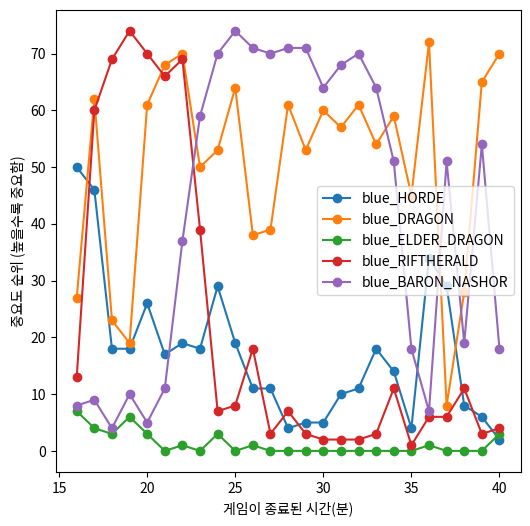

In [10]:
blue_objects = ['blue_HORDE','blue_DRAGON','blue_ELDER_DRAGON','blue_RIFTHERALD','blue_BARON_NASHOR']

plt.figure(figsize=(6,6))

for blue_object in blue_objects:
    # plt.plot(game_minutes[i], accuracies[i], 'o-', color=colors[i], label=f'{15 + 5 * i}~{16 + 5 * i}분 게임')  # 데이터 포인트와 선
    plt.plot(range(16,41), object_rankings_df.loc[blue_object, ], "o-", label = blue_object)

plt.xlabel('게임이 종료된 시간(분)')
plt.ylabel('중요도 순위 (높을수록 중요함)')
plt.title('')
plt.legend()
plt.show()


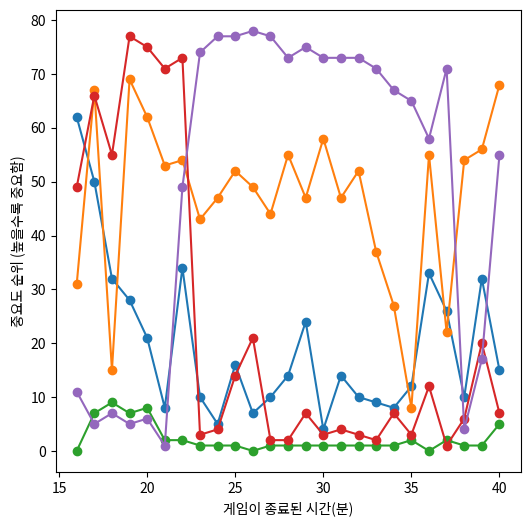

In [11]:
red_objects = ['red_HORDE','red_DRAGON','red_ELDER_DRAGON','red_RIFTHERALD','red_BARON_NASHOR']

plt.figure(figsize=(6,6))

for red_object in red_objects:
    # plt.plot(game_minutes[i], accuracies[i], 'o-', color=colors[i], label=f'{15 + 5 * i}~{16 + 5 * i}분 게임')  # 데이터 포인트와 선
    plt.plot(range(16,41), object_rankings_df.loc[red_object, ], "o-", label = red_object)

plt.xlabel('게임이 종료된 시간(분)')
plt.ylabel('중요도 순위 (높을수록 중요함)')
plt.title('')
# plt.legend()
plt.show()


# 새로운 게임 예측

In [3]:
from LOL_data_pipeline import *

api_key = 'RGAPI-9fc3329b-e203-4436-8221-6dbf452ed2b0'

API_hander = APIHander(api_key)

In [4]:
def replace_numbers(e, number_position_mapping):
    for num, position in number_position_mapping.items():
        e = e.replace(num, position)
    return e

In [5]:
a_new_game_timeline = pd.DataFrame(API_hander.get_game_timeline_information("KR_7368731375")['info']['frames'])
NewGameSummary = EventRecorder()

a_game_summaries = []

each_team_positions = NewGameSummary.find_positions(a_new_game_timeline)
blue_number_position_mapping = {f"{number}" : f"blue_{each_team_positions[0][number - 1]}" for number in range(1,6)}
red_number_position_mapping = {f"{number + 5}" : f"red_{each_team_positions[1][number - 1]}" for number in range(1,6)}
number_position_mapping = red_number_position_mapping | blue_number_position_mapping
# 매 판 각 팀의 포지션 번호를 기록

for index in range(1, len(a_new_game_timeline)):
    a_minute_events = pd.DataFrame(a_new_game_timeline.loc[index, "events"])
    a_minute_events.apply(NewGameSummary.update_score_board, axis = 1) # CS를 제외한 모든 정보를 기록해줌.
    pd.Series(range(1,11)).apply(lambda x : NewGameSummary.update_score_board_from_CS(x, index, a_new_game_timeline))

    if index >= 5: # 5분 이상의 정보만 기록
        record_dicts = [NewGameSummary.record_KDACS, 
                        NewGameSummary.record_building, 
                        NewGameSummary.record_turret_plate, 
                        NewGameSummary.record_object,
                        NewGameSummary.record_level,
                        NewGameSummary.record_blue_win]
        a_game_summary_until_minute = pd.concat([pd.DataFrame([record_dict]) for record_dict in record_dicts], axis = 1)
        new_col_name = [replace_numbers(e, number_position_mapping) for e in list(a_game_summary_until_minute.columns)]
        a_game_summary_until_minute.columns = new_col_name
        
        a_game_summaries.append(a_game_summary_until_minute)


In [6]:
for idx in range(len(a_game_summaries)):
    a_game_summaries[idx] = a_game_summaries[idx].drop(columns = ["blue_win"])

In [7]:
len(a_game_summaries)

24

In [8]:
len(accuracies_14_21[12])

NameError: name 'accuracies_14_21' is not defined

## 게임 종료 시간을 알 때 예측

In [21]:
new_game_accuracies = []

for idx in range(len(rf_models_14_21[12])):
    predicted_win_rate = rf_models_14_21[12][idx].predict_proba(a_game_summaries[idx])
    new_game_accuracies.append(predicted_win_rate)

In [28]:
predicted_blue_win_rates = []

for idx in range(len(new_game_accuracies)):
    predicted_blue_win_rate = new_game_accuracies[idx][0][1]
    predicted_blue_win_rates.append(predicted_blue_win_rate)

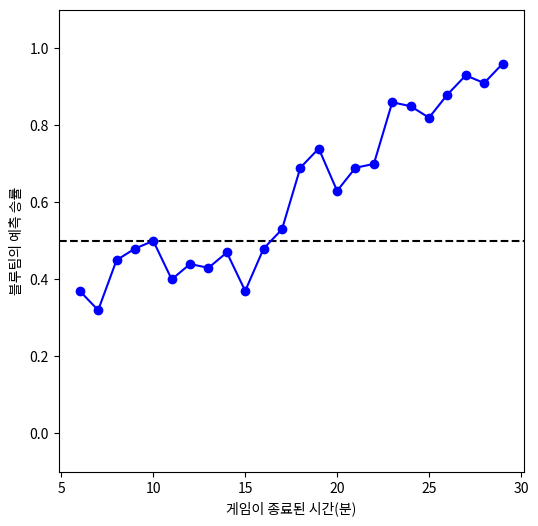

In [33]:
plt.figure(figsize=(6,6))

# y축 범위 설정
plt.ylim(-0.1, 1.1)

# 승률 기준선 그리기
plt.axhline(y=0.5, color='black', linestyle='--')  # 하단 빨간 점선 (y=0.5)

# 그래프 그리기
plt.plot(range(6,30), predicted_blue_win_rates, 'o-', color='blue')  # 데이터 포인트와 선

# 축 레이블 설정
plt.xlabel('게임이 종료된 시간(분)')
plt.ylabel('블루팀의 예측 승률')


# 그래프 보여주기
plt.show()

## 게임 종료 시간을 모를 때 예측

5, 15, 20, 25

rf_models_14_21 은, 15~16분, 16~17분, ..., 39~40분까지의 정보가 있음 총 25개

그리고 각 정보는, 5분까지의 누적, 6분까지의 누적, ... 으로 승패를 예측

내가 새로 가져온 게임은, len이 24.

그 말인 즉슨, 5분 누적, 6분 누적, ..., 28분 누적 까지 있다는 소리임.

내가 5분까지의 누적 정보를 갖고 오면, 모든 rf_model을 활용해서 승패를 예측 가능

15분까지의 누적 정보를 갖고 오면, 모든 rf_model을 활용해서 승패를 예측 가능

20분까지의 누적 정보를 갖고 오면, 6번째 모델(index == 5)부터 사용 가능

25분까지의 누적 정보를 갖고 오면, 11번째 모델(index == 10)부터 사용 가능


In [39]:
len(a_game_summaries)

24

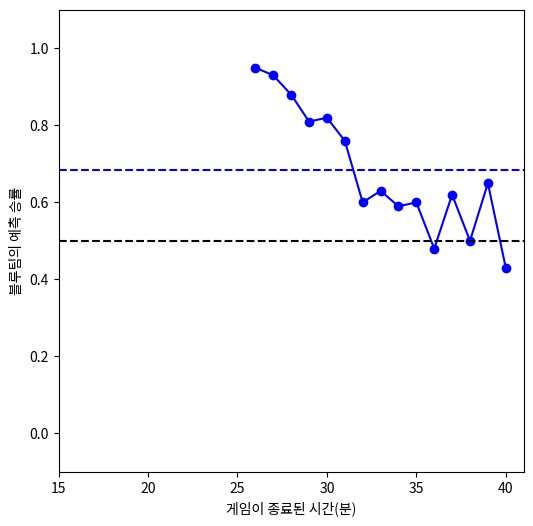

In [45]:
game_elapsed_minute = 25

predicted_blue_win_rates = []

model_search_range = range(0,25) if game_elapsed_minute <= 15 else range(game_elapsed_minute - 15, 25)
for i in model_search_range:
    k = game_elapsed_minute - 5
    rf_model = rf_models_14_21[i][k]
    accuracy = rf_model.predict_proba(a_game_summaries[k])
    predicted_blue_win_rates.append(accuracy[0][1])


plt.figure(figsize=(6,6))

# y축 범위 설정
plt.ylim(-0.1, 1.1)
plt.xlim(15,41)

x_range = range(16,41) if game_elapsed_minute <= 15 else range(game_elapsed_minute - 15 + 16, 41)
# 그래프 그리기
plt.plot(x_range, predicted_blue_win_rates, 'o-', color='blue')  # 데이터 포인트와 선

average_predicted_win_rate = sum(predicted_blue_win_rates)/len(predicted_blue_win_rates)
# 승률 기준선 그리기
plt.axhline(y=average_predicted_win_rate, color='blue', linestyle='--')  # 하단 빨간 점선 (y=0.5)
plt.axhline(y=0.5, color='black', linestyle='--')  # 하단 빨간 점선 (y=0.5)

# 축 레이블 설정
plt.xlabel('게임이 종료된 시간(분)')
plt.ylabel('블루팀의 예측 승률')


# 그래프 보여주기
plt.show()